In [43]:
import graph_tool
from graph_tool.all import *
import matplotlib.pyplot as plt
from itertools import chain
from mpl_toolkits.basemap import Basemap # somehow not working 
import graph_tool as gt
import numpy as np
import matplotlib.pyplot as plt
from graph_tool.all import GraphView, graph_draw, prop_to_size
import json
import pandas as pd

In [44]:
def load_dict(edges_file, nodes_file):
    # Load data_WS2425 from JSON files
    with open(edges_file, 'r') as json_file:
        edges_dict = json.load(json_file)

    with open(nodes_file, 'r') as json_file:
        nodes_dict = json.load(json_file)

    return nodes_dict, edges_dict

In [46]:
# Process W2 and W1 datasets
w1_nodes, w1_edges = load_dict(
    '/Users/ramius/Desktop/CodeVault/01_Project/Work/Susumu/Student_Survey/StudentSurvey_GitDock/data_WS2425/NA/edges_W1.json',
    '/Users/ramius/Desktop/CodeVault/01_Project/Work/Susumu/Student_Survey/StudentSurvey_GitDock/data_WS2425/NA/nodes_W1.json'
)

w2_nodes, w2_edges = load_dict(
    '/Users/ramius/Desktop/CodeVault/01_Project/Work/Susumu/Student_Survey/StudentSurvey_GitDock/data_WS2425/NA/edges_W2.json',
    '/Users/ramius/Desktop/CodeVault/01_Project/Work/Susumu/Student_Survey/StudentSurvey_GitDock/data_WS2425/NA/nodes_W2.json',
)

w3_nodes, w3_edges = load_dict(
    '/Users/ramius/Desktop/CodeVault/01_Project/Work/Susumu/Student_Survey/StudentSurvey_GitDock/data_WS2425/NA/edges_W3.json',
    '/Users/ramius/Desktop/CodeVault/01_Project/Work/Susumu/Student_Survey/StudentSurvey_GitDock/data_WS2425/NA/nodes_W3.json',
)

In [55]:
# Convert each dictionary into a DataFrame
df1 = pd.DataFrame.from_dict(w1_nodes, orient='index')
df2 = pd.DataFrame.from_dict(w2_nodes, orient='index')
df3 = pd.DataFrame.from_dict(w3_nodes, orient='index')

# Merge all DataFrames by their index (keys)
df_merged = df1.merge(df2, left_index=True, right_index=True, how='outer') \
               .merge(df3, left_index=True, right_index=True, how='outer')

# Sort columns alphabetically
df_merged_sorted = df_merged.sort_index(axis=1)

# Display result
print(df_merged_sorted)


      age  age_x  age_y  catdog  gender  gender_x  gender_y  grade  grade_x  \
39b  18.0   18.0   18.0     3.0     1.0       1.0       1.0    2.7      2.7   
3ab  20.0   20.0   20.0     2.0     2.0       2.0       2.0    3.7      3.0   
3eh  20.0   20.0   20.0     1.0     2.0       2.0       2.0    2.7      3.0   
3fv  19.0   19.0   19.0     1.0     1.0       1.0       1.0    3.7      2.3   
3hc  24.0   24.0   24.0     2.0     1.0       1.0       1.0    2.7      2.7   
..    ...    ...    ...     ...     ...       ...       ...    ...      ...   
yg9  20.0   19.0   19.0     1.0     1.0       1.0       1.0    3.0      2.7   
yqq  20.0   20.0   20.0     3.0     1.0       1.0       1.0    3.7      3.3   
ytr  20.0   19.0   19.0     2.0     2.0       2.0       2.0 -999.0   -999.0   
yuc  19.0   19.0   19.0     1.0     1.0       1.0       1.0    3.3      2.7   
ywc  19.0   19.0   19.0     3.0     1.0       1.0       1.0    2.7      2.0   

     grade_y  ...  leftrightself_x  leftrightself_y

In [2]:
G1 = graph_tool.load_graph("/Users/ramius/Desktop/CodeVault/01_Project/Work/Susumu/Student_Survey/StudentSurvey_GitDock/data_WS2425/NA/multiplex_graph_w1.gml")
G2 = graph_tool.load_graph("/Users/ramius/Desktop/CodeVault/01_Project/Work/Susumu/Student_Survey/StudentSurvey_GitDock/data_WS2425/NA/multiplex_graph_w2.gml")
G3 = graph_tool.load_graph("/Users/ramius/Desktop/CodeVault/01_Project/Work/Susumu/Student_Survey/StudentSurvey_GitDock/data_WS2425/NA/multiplex_graph_w3.gml")

In [3]:
def prune_graph(G):
    u = GraphView(G, vfilt= G.get_total_degrees(G.get_vertices()) > 0)
    Pruned_Graph = Graph(u, prune=True)
    return Pruned_Graph

In [5]:
G1 = prune_graph(G1)
G2 = prune_graph(G2)
G3 = prune_graph(G3)

In [36]:
G3.vp["label"]

<VertexPropertyMap object with value type 'string', for Graph 0x307a9aa40, at 0x307a9b4c0>

In [32]:
print("Vertex properties:")
for prop in G1.vp:
    print(f"- {prop}: {G3.vp[prop]}")

# List all edge properties
print("Edge properties:")
for prop in G1.ep:
    print(f"- {prop}: {G3.ep[prop]}")

Vertex properties:
- age: <VertexPropertyMap object with value type 'double', for Graph 0x307a9aa40, at 0x307a99210>
- gender: <VertexPropertyMap object with value type 'double', for Graph 0x307a9aa40, at 0x307a99a20>
- grade: <VertexPropertyMap object with value type 'double', for Graph 0x307a9aa40, at 0x307a98400>
- income: <VertexPropertyMap object with value type 'double', for Graph 0x307a9aa40, at 0x307a985e0>
- label: <VertexPropertyMap object with value type 'string', for Graph 0x307a9aa40, at 0x307a9b4c0>
- leftrightself: <VertexPropertyMap object with value type 'double', for Graph 0x307a9aa40, at 0x307a9a2c0>
- partyvote: <VertexPropertyMap object with value type 'double', for Graph 0x307a9aa40, at 0x307a9ace0>
- rent: <VertexPropertyMap object with value type 'double', for Graph 0x307a9aa40, at 0x307a9add0>
Edge properties:
- key: <EdgePropertyMap object with value type 'double', for Graph 0x307a9aa40, at 0x307a98d60>
- type: <EdgePropertyMap object with value type 'string',

In [18]:
len(G3.vp["gender"].get_array())

146

In [8]:
# Convert edge properties to numpy arrays
key_values = G3.ep["key"].get_array()
weight_values = G3.ep["weight"].get_array()

type_prop = G3.ep["type"]  # Edge property 'type'
type_values = [type_prop[edge] for edge in G3.edges()]

# Print the arrays
#print("Key values:", key_values)
print("Weight values:", weight_values)
print("Type Values:", type_values)


zip = pd.DataFrame({"key": key_values, "weight": weight_values, "type": type_values})
zip

Weight values: [0. 3. 1. ... 6. 0. 0.]
Type Values: ['aquaintance', 'leftright', 'sentiment', 'friend', 'value', 'politics', 'study', 'council', 'aquaintance', 'leftright', 'sentiment', 'politics', 'council', 'aquaintance', 'leftright', 'sentiment', 'friend', 'value', 'politics', 'study', 'council', 'aquaintance', 'leftright', 'sentiment', 'friend', 'value', 'politics', 'study', 'council', 'aquaintance', 'leftright', 'sentiment', 'friend', 'value', 'politics', 'study', 'council', 'aquaintance', 'leftright', 'sentiment', 'politics', 'council', 'aquaintance', 'leftright', 'sentiment', 'friend', 'value', 'politics', 'study', 'council', 'aquaintance', 'leftright', 'sentiment', 'friend', 'value', 'politics', 'study', 'council', 'aquaintance', 'leftright', 'sentiment', 'friend', 'value', 'politics', 'council', 'aquaintance', 'leftright', 'sentiment', 'value', 'politics', 'council', 'aquaintance', 'leftright', 'sentiment', 'value', 'council', 'aquaintance', 'leftright', 'sentiment', 'value', 

,key,weight,type
0,0.0,0.0,aquaintance
1,1.0,3.0,leftright
2,2.0,1.0,sentiment
3,3.0,0.0,friend
4,4.0,0.0,value
...,...,...,...
3133,3.0,0.0,council
3134,0.0,0.0,aquaintance
3135,1.0,6.0,leftright
3136,2.0,0.0,sentiment


In [9]:
def filter_graph(G, Relation):
    type_prop = G.ep["type"]

    # Filter the edges where type is 'friend'
    type_values = [type_prop[edge] for edge in G.edges()]
    filtered_graph = GraphView(G, efilt=[type_val == Relation for type_val in type_values])
    return filtered_graph

In [15]:
G3.ep["weight"].get_array()

PropertyArray([0., 3., 1., ..., 6., 0., 0.], shape=(3138,))

In [14]:
G3_value = filter_graph(G3, "value")
G3_value.get_edges()

array([[  0,   1],
       [  0,   3],
       [  0,   4],
       [  1,   0],
       [  1,   3],
       [  1,   4],
       [  2,   1],
       [  2,   0],
       [  2,   3],
       [  2,  10],
       [  2,  11],
       [  2,  12],
       [  2,  13],
       [  2,  14],
       [  2,  15],
       [  2,  16],
       [  3,   4],
       [  3,   2],
       [  3,   0],
       [  3,   1],
       [  4,   1],
       [  4,   0],
       [  4,   3],
       [  5,   6],
       [  5,   7],
       [  7,   6],
       [  7,   5],
       [  7,  26],
       [  9,  78],
       [  9,  34],
       [ 10,  99],
       [ 10, 114],
       [ 10,  27],
       [ 10,   2],
       [ 10, 115],
       [ 12,  15],
       [ 12,   2],
       [ 13,  14],
       [ 13,  41],
       [ 13,  15],
       [ 14,  13],
       [ 14,  41],
       [ 14,  15],
       [ 14,   2],
       [ 15,  41],
       [ 15,   2],
       [ 15,   0],
       [ 16,  63],
       [ 16,  23],
       [ 16,  18],
       [ 17,  49],
       [ 17,  50],
       [ 18,

In [30]:
from graph_tool.all import GraphView, assortativity

List_relations = ["friend", "value", "sentiment", "leftright", "aquaintance", "study", "council", "politics"]
List_properties = ["age", "gender", "grade", "income", "rent", "leftrightself", "partyvote"]
res = []

def func_assortativity(G, Relation="friend", Property="ocu_father", G_name="G"):
    # Access edge property "type" for filtering
    type_prop = G.ep["type"]
    
    # Filter the edges where type is 'friend'
    type_values = [type_prop[edge] for edge in G.edges()]
    u = GraphView(G, efilt=[type_val == Relation for type_val in type_values])

    # Assortativity based on the 'ocu_father' property map
    assortativity_coefficient = assortativity(u, deg=u.vp[Property])
    
    if assortativity_coefficient[0] > 0.2:
        print(f"Assortativity Coefficient for '{G_name}', '{Relation}' '{Property}': {assortativity_coefficient}")

    return assortativity_coefficient

In [31]:
# Call the function on your graph G3
for i in List_relations:
    for j in List_properties:
        res.append(func_assortativity(G1, Relation=i, Property=j, G_name="G1"))
        res.append(func_assortativity(G2, Relation=i, Property=j, G_name="G2"))
        res.append(func_assortativity(G3, Relation=i, Property=j, G_name="G3"))

Assortativity Coefficient for 'G1', 'friend' 'gender': (0.5379772028225078, 0.04651406678028252)
Assortativity Coefficient for 'G2', 'friend' 'gender': (0.4674587186523485, 0.047340783632640084)
Assortativity Coefficient for 'G3', 'friend' 'gender': (0.5389803870207261, 0.045212111364318894)
Assortativity Coefficient for 'G3', 'friend' 'partyvote': (0.2407677727183599, 0.03240031976438459)


KeyError: ('v', 'ocu_father')

In [157]:
type_prop = G3.ep["type"]  
type_values = [type_prop[edge] for edge in G3.edges()]

u = GraphView(G3,  efilt=[type_val == 'Friend' for type_val in type_values])
u2 = GraphView(u, vfilt= u.get_total_degrees(u.get_vertices()) > 0)

filtered_graph = Graph(u2, prune=True)

In [158]:
G3.vp["leftrightself"]

<VertexPropertyMap object with value type 'double', for Graph 0x307a9aa40, at 0x307a9a2c0>

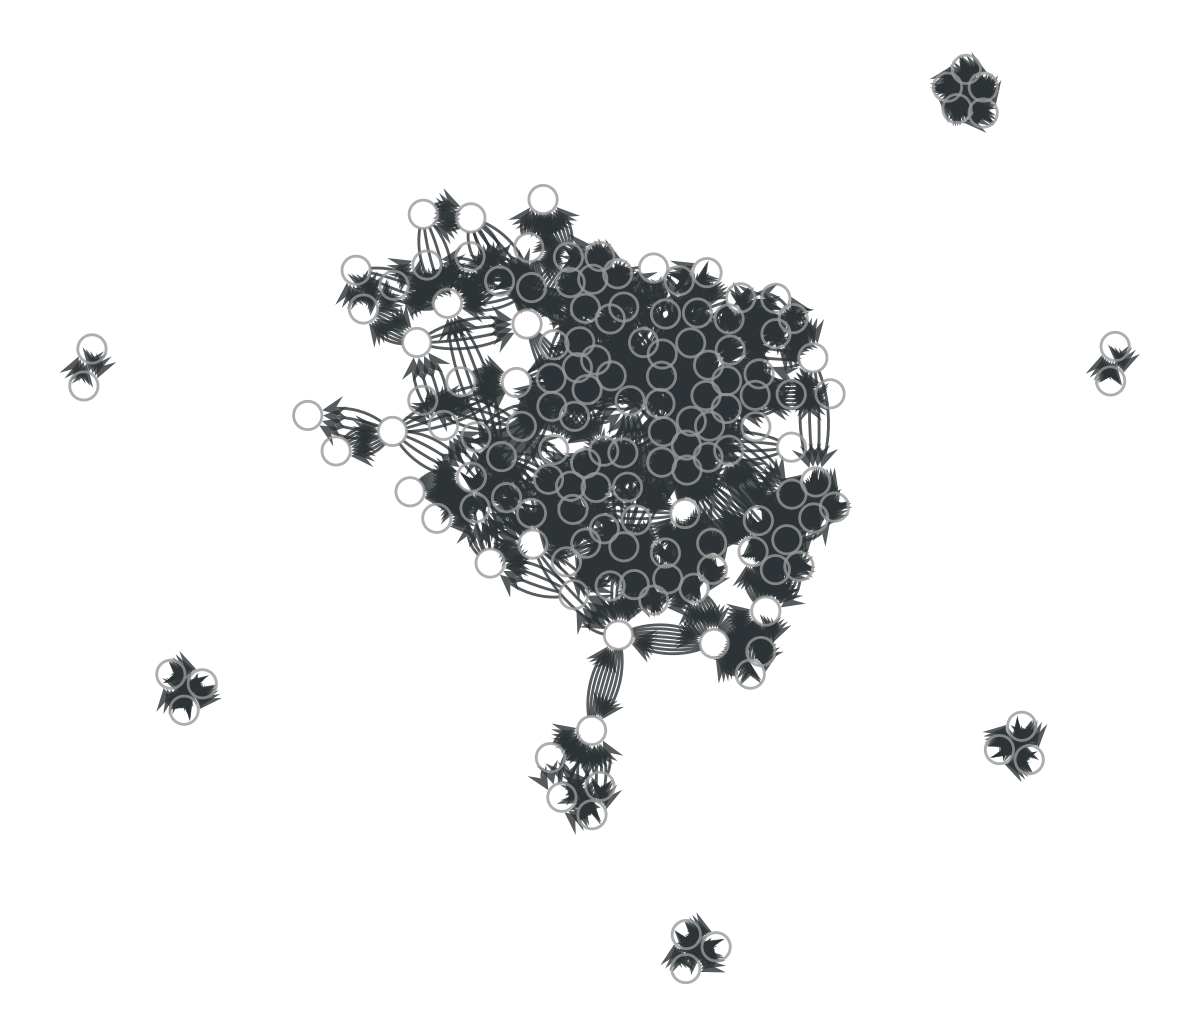

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x307a9aa40, at 0x3183248b0>

In [159]:
state = NormalBPState(G3, x)

s = state.sample()
graph_draw(G3, sfdp_layout(G3), vertex_fill_color=s)

In [160]:
g = filtered_graph
E = g.num_edges()
N = g.num_vertices()
w = g.new_ep("double", vals=np.random.normal(N/(2*E), .05, E))  # True edge weights
istate = LVBlockState(g)

M = 1000
X = []
for m in range(M):
    istate.iterate_sync()
    X.append(istate.get_state().a.copy())
X = np.array(X).T

ZeroDivisionError: division by zero

In [110]:
state = IsingGlauberBlockState(X, directed=True, self_loops=False)

for i in range(10):
    delta, *_ = state.mcmc_sweep(beta=np.inf, niter=10)
    print(delta)

-0.46179065406766995
-2864.001008445733
-745.9529228925614
-211.62738689871958
-143.2202920118278
-134.05674394977945
-17.745195700919624
-0.0012263400731615803
-1.8829382497642655e-13
-0.00010621699896518066


In [100]:
u = state.get_graph()      # reconstructed network
w_r = state.get_x()        # reconstructed weights
t_r = state.get_theta()    # reconstructed thetas

print(similarity(g, u, w, w_r))

0.8245292924924199


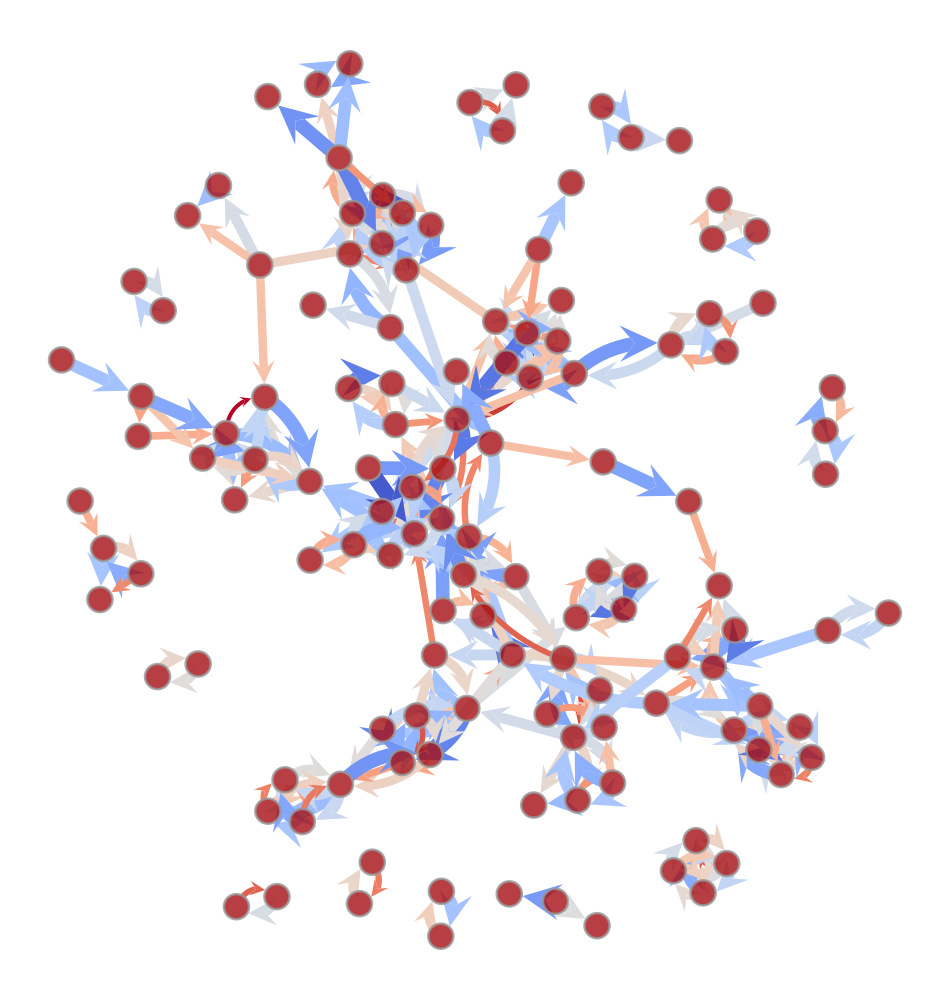

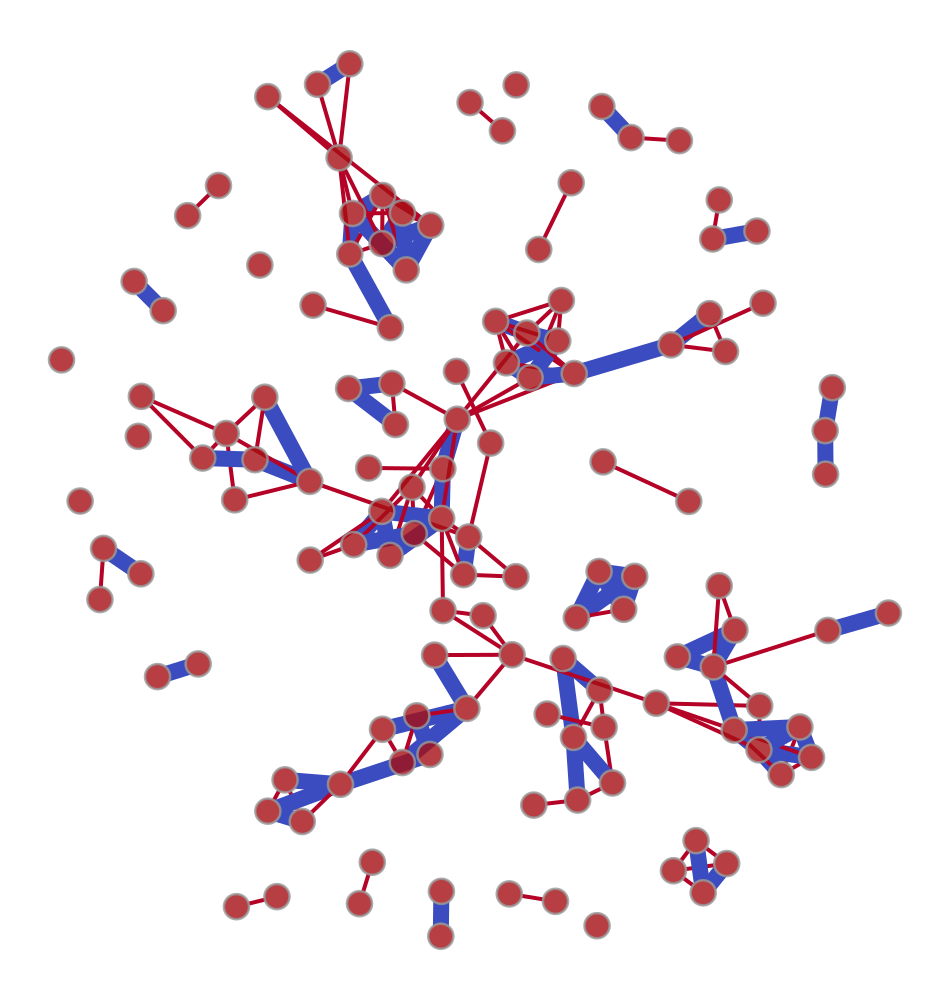

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x3182d6860, at 0x30d360f40>

In [101]:

# Compute a layout (e.g., Fruchterman-Reingold)
pos = sfdp_layout(g)

# Store the layout in the graph's vertex properties
g.vp.pos = pos  # Now `g.vp.pos` holds the coordinates

# Original graph
graph_draw(g,pos=g.vp.pos, edge_pen_width=prop_to_size(w.t(abs), 2, 8, power=1), edge_color=w,
              ecmap=plt.cm.coolwarm_r, output_size=(500, 500),)

# Inferred graph
graph_draw(u,pos=g.vp.pos, edge_pen_width=prop_to_size(w_r.t(abs), 2, 8, power=1), edge_color=w_r,
              ecmap=plt.cm.coolwarm_r, output_size=(500, 500),)


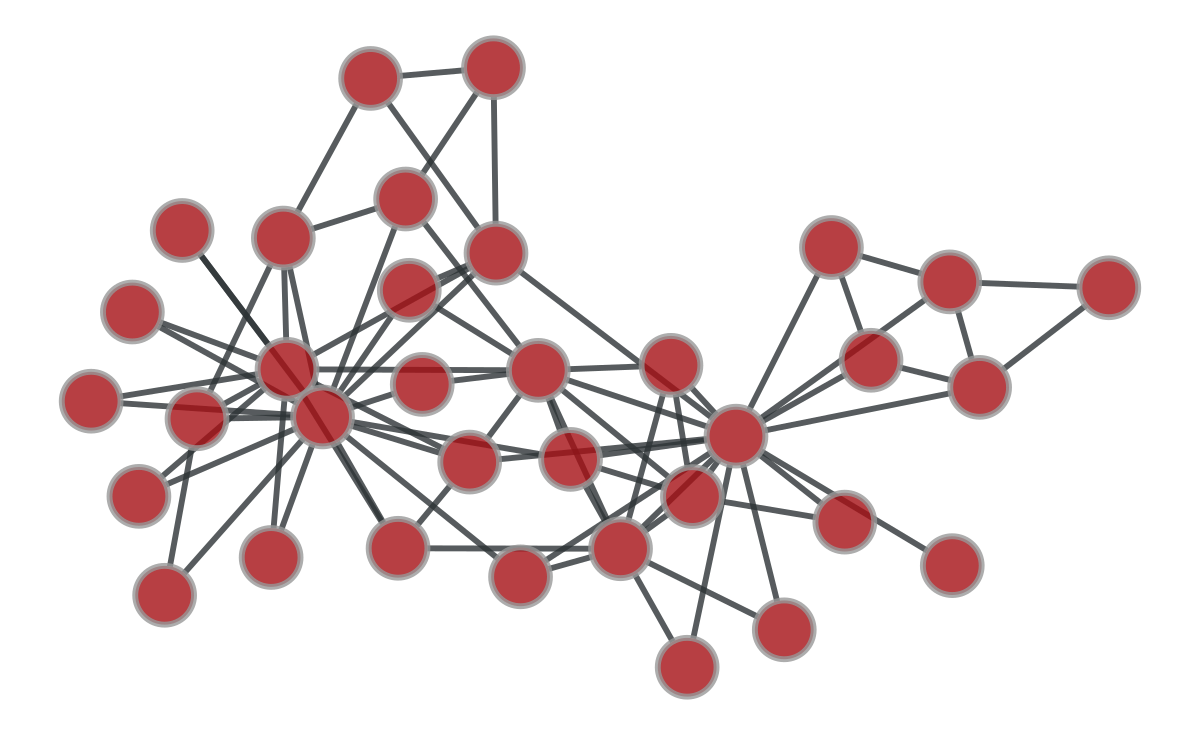

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x30d361d80, at 0x318324c70>

In [102]:

# Create a graph
g = collection.data["karate"]

# Compute a layout (e.g., Fruchterman-Reingold)
pos = sfdp_layout(g)

# Store the layout in the graph's vertex properties
g.vp.pos = pos  # Now `g.vp.pos` holds the coordinates

# Draw the graph using the stored positions
graph_draw(g, pos=g.vp.pos)

Number of edges in the filtered graph: 352


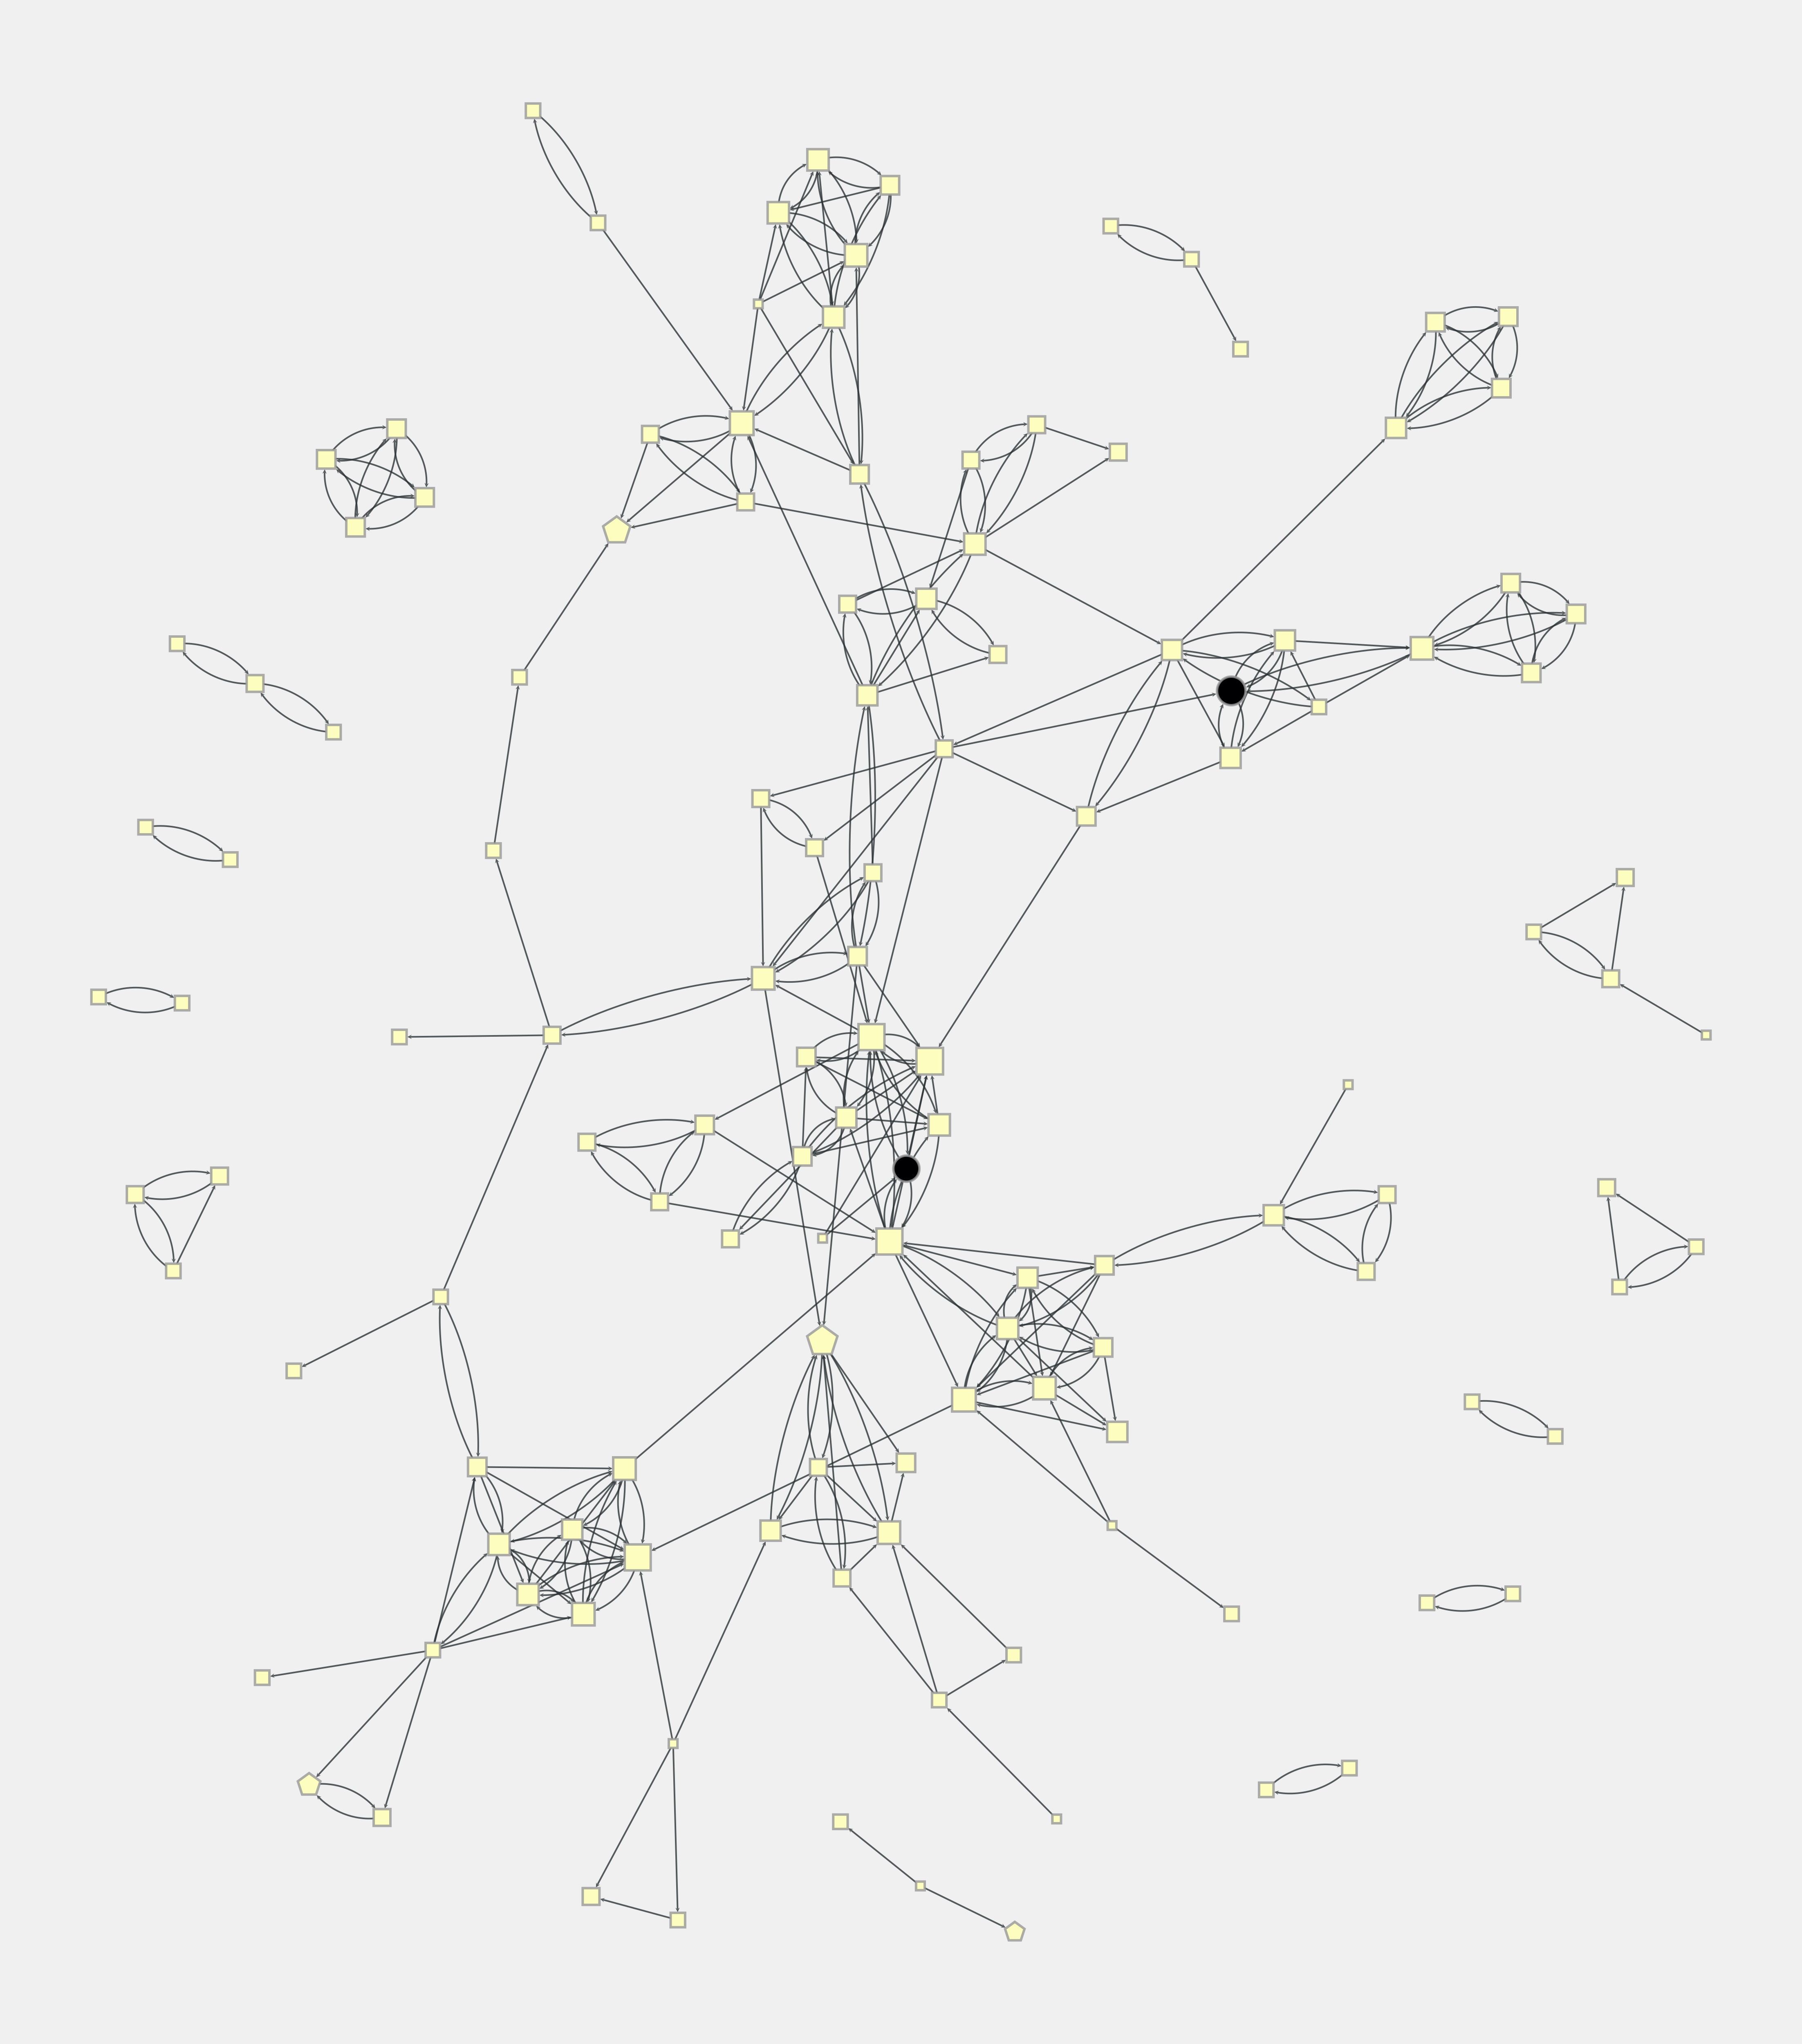

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x3182d6860, at 0x3170a33d0>

In [103]:
type_prop = G3.ep["type"]  
type_values = [type_prop[edge] for edge in G3.edges()]

u = GraphView(G3,  efilt=[type_val == 'friend' for type_val in type_values])
u2 = GraphView(u, vfilt= u.get_total_degrees(u.get_vertices()) > 0)

filtered_graph = Graph(u2, prune=True)

deg = filtered_graph.degree_property_map("in")
deg.a = 15 + 5 * (pow(deg.a, 0.5)*2)

# Print the number of edges in the filtered graph
print(f"Number of edges in the filtered graph: {filtered_graph.num_edges()}")
# Draw the graph with colored edges
graph_draw(
    filtered_graph,
    output_size=(2500, 2500),
    edge_pen_width=2,
    vertex_size=deg,
    vertex_fill_color=prop_to_size(filtered_graph.vp["catdog"], 0, 3, power=1),
    #edge_color=prop_to_size(filtered_graph.ep["weight"], 0, 5, power=1),
    vertex_shape=prop_to_size(filtered_graph.vp["catdog"], 0, 3, power=1),
    bg_color="#f0f0f0",
)
